<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Formula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width='50%' aling='center' src='https://github.com/leonarddocchagas/data_science/blob/master/projetos/formula1/f1-logo.png?raw=true' />

**Formula 1 World Championship**

Fórmula 1 é a mais popular modalidade de automobilismo do mundo. É a categoria mais avançada do esporte a motor e é regulamentada pela Federação Internacional de Automobilismo.

A história da Fórmula 1 tem início com as competições de Grandes Prêmios disputadas na Europa, no início do século XX, apenas com uma pausa de 1939 até 9 de Setembro de 1945, no Circuito de Silverstone, prosseguindo até a atualidade, sem interrupções e com 72 pistas usadas

*fonte:* https://pt.wikipedia.org/wiki/F%C3%B3rmula_1 

## Sobre os dados

O dados estão separados em diversos arquivos. A depender da análise, será necessário fazer a junção das bases para obter mais informação.

* Dados coletados do keggle
  * Datasets: https://bit.ly/3hDUNLZ

* Lista datasets:
  * circuits.csv
  * constructor_results.csv
  * constructor_standings.csv
  * constructors.csv
  * driver_standings.csv
  * drivers.csv
  * lap_times.csv
  * pit_stops.csv
  * qualifying.csv
  * races.csv
  * results.csv
  * seasons.csv
  * status.csv




##Obtenção e transformação dos dados

**Carrega e verifica dataset**

In [ ]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# dataset drives
df_driver = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/formula1/drivers.csv')
df_driver.drop(columns=['url', 'number', 'dob', 'driverRef'], inplace=True)
df_driver.loc[:0]

,driverId,code,forename,surname,nationality
0,1,HAM,Lewis,Hamilton,British


In [ ]:
# dataset driver_standings
df_driver_standings = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/formula1/driver_standings.csv')
df_driver_standings.drop(columns=['driverStandingsId'], inplace=True)
df_driver_standings.loc[:0]

,raceId,driverId,points,position,positionText,wins
0,18,1,10.0,1,1,1


In [ ]:
# dataset racer
df_racer = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/formula1/races.csv')
df_racer.drop(columns=['url', 'time'], inplace=True)
df_racer.head(1)

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,2009-03-29


Com os dataset separados, vamos unir o `df_driver`, `df_driver_standings`, `df_race`, assim, temos uma visão geral a performance de pontuação dos pilotos. 

In [ ]:
# juntando os datasets com (left join)
df_full = pd.merge(df_driver_standings, df_driver, how='left', on='driverId')
df_full = pd.merge(df_full, df_racer, how='left', on='raceId')

# deletando colunas
df_full.drop(columns=['raceId', 'driverId', 'circuitId'], inplace=True)
df_full.head()

,points,position,positionText,wins,code,forename,surname,nationality,year,round,name,date
0,10.0,1,1,1,HAM,Lewis,Hamilton,British,2008,1,Australian Grand Prix,2008-03-16
1,8.0,2,2,0,HEI,Nick,Heidfeld,German,2008,1,Australian Grand Prix,2008-03-16
2,6.0,3,3,0,ROS,Nico,Rosberg,German,2008,1,Australian Grand Prix,2008-03-16
3,5.0,4,4,0,ALO,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,2008-03-16
4,4.0,5,5,0,KOV,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,2008-03-16


In [ ]:
# verificando entradas
print('Entradas:', df_full.shape[0])
print('Variáveis: ', df_full.shape[1])

Entradas: 33025
Variáveis:  12


In [ ]:
# os tipos de dados
df_full.dtypes

points          float64
position          int64
positionText     object
wins              int64
code             object
forename         object
surname          object
nationality      object
year              int64
round             int64
name             object
date             object
dtype: object

In [ ]:
# dados ausentes
df_full.isnull().sum()

points          0
position        0
positionText    0
wins            0
code            0
forename        0
surname         0
nationality     0
year            0
round           0
name            0
date            0
dtype: int64

Logo após verificar as 5 primeiras entradas em nosso dataset usando o método `head()`, olhamos o total de entradas e de variáveis e depois, a quantidade de dado ausente. Em momento raro, quando se fala em conjunto de dados, nosso dataset não possuem nenhum registro ausente e isso é muito bom. 

**Transformação**

In [ ]:
# converter variável data para tipo date
df_full['date'] = pd.to_datetime(df_full['date'])

# converter float to int
df_full['points'] = df_full['points'].astype('int64')

In [ ]:
# adicionando coluna
win_label = {1:'Venceu', 0:'Perdeu'}
df_full['wins_text'] = df_full['wins'].replace(win_label)

In [ ]:
# verificando as 5 primeiras entradas
df_full.head()

,points,position,positionText,wins,code,forename,surname,nationality,year,round,name,date,wins_text
0,10,1,1,1,HAM,Lewis,Hamilton,British,2008,1,Australian Grand Prix,2008-03-16,Venceu
1,8,2,2,0,HEI,Nick,Heidfeld,German,2008,1,Australian Grand Prix,2008-03-16,Perdeu
2,6,3,3,0,ROS,Nico,Rosberg,German,2008,1,Australian Grand Prix,2008-03-16,Perdeu
3,5,4,4,0,ALO,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,2008-03-16,Perdeu
4,4,5,5,0,KOV,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,2008-03-16,Perdeu


##Visualização

In [ ]:
# função aumentar a fonte e outros style saída das celulas
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      break
    }
  }
  '''))

<IPython.core.display.Javascript object>

71 é o número total de anos de formula 1 em nosso dataset.
 


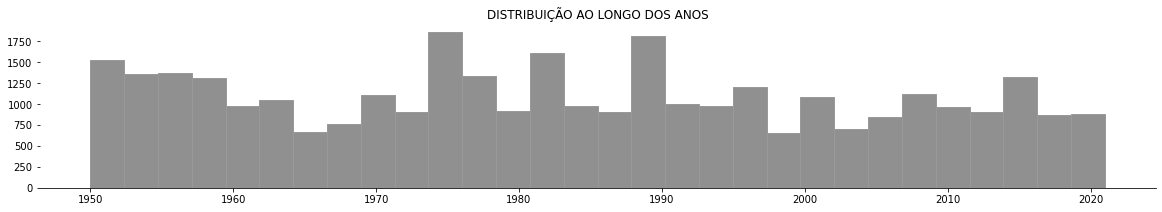

In [ ]:
# total de corridas
increase_font()
print('{} é o número total de anos de formula 1 em nosso dataset.'.format(df_full['year'].max() - df_full['year'].min()))
print(' ')

# plot histograma
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
# gráfico
ax.hist(df_full['year'], color='#909090', bins=30, edgecolor = "#999999")
ax.set_title('DISTRIBUIÇÃO AO LONGO DOS ANOS')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.("off")
plt.show()

É possivel analisar que a quantidade de corridas não é a mesma. Em alguns anos, existiram mais e em outros, menos. Como nosso objetivo é didático, vamos resumir ainda mais nosso conjunto de dados, filtrando apenas os últimos 21 anos e também, criar outros menores.  

In [ ]:
# criando dataset dos últimos 21 anos
df_21anos = df_full.loc[df_full['year'] >= 2000]
df_21anos.head()

,points,position,positionText,wins,code,forename,surname,nationality,year,round,name,date,wins_text
0,10,1,1,1,HAM,Lewis,Hamilton,British,2008,1,Australian Grand Prix,2008-03-16,Venceu
1,8,2,2,0,HEI,Nick,Heidfeld,German,2008,1,Australian Grand Prix,2008-03-16,Perdeu
2,6,3,3,0,ROS,Nico,Rosberg,German,2008,1,Australian Grand Prix,2008-03-16,Perdeu
3,5,4,4,0,ALO,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,2008-03-16,Perdeu
4,4,5,5,0,KOV,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,2008-03-16,Perdeu


In [ ]:
# dataset dos vencedores
df_winner = df_21anos.loc[df_21anos['wins'] == 1]
df_winner.head()

,points,position,positionText,wins,code,forename,surname,nationality,year,round,name,date,wins_text
0,10,1,1,1,HAM,Lewis,Hamilton,British,2008,1,Australian Grand Prix,2008-03-16,Venceu
8,14,1,1,1,HAM,Lewis,Hamilton,British,2008,2,Malaysian Grand Prix,2008-03-23,Venceu
15,11,2,2,1,RAI,Kimi,Räikkönen,Finnish,2008,2,Malaysian Grand Prix,2008-03-23,Venceu
26,14,3,3,1,HAM,Lewis,Hamilton,British,2008,3,Bahrain Grand Prix,2008-04-06,Venceu
33,19,1,1,1,RAI,Kimi,Räikkönen,Finnish,2008,3,Bahrain Grand Prix,2008-04-06,Venceu


In [ ]:
# lista de nacionalidades vencedoras
df_winner['nationality'].value_counts()#.sort_index().plot.barh()

German        113
British       101
Finnish        97
Italian        63
Dutch          47
Spanish        40
Australian     38
Brazilian      26
Venezuelan     16
Colombian      13
Polish         12
French         10
Mexican         2
Monegasque      1
Name: nationality, dtype: int64

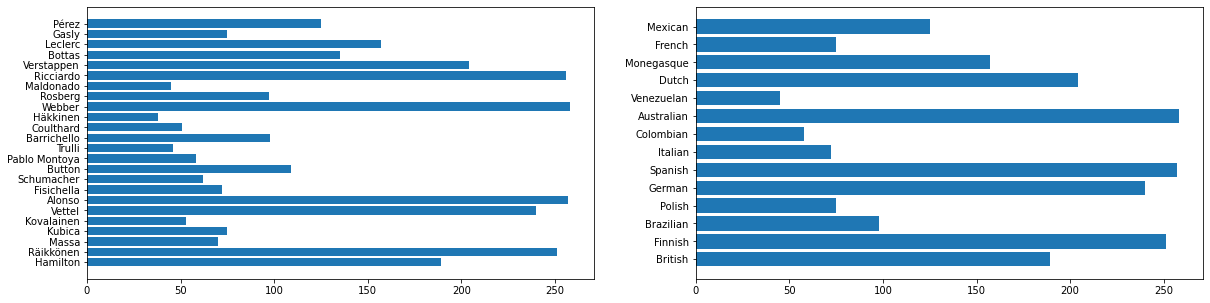

In [ ]:
# piloto x nacionalidades
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2,  figsize=(20, 5))

# ax
ax.barh(df_winner['surname'], df_winner['points'])

# ax1
ax1.barh(df_winner['nationality'], df_winner['points'])

plt.show()

In [ ]:
# Nome dos pilotos que estão ou passaram pela F1
df_21anos['surname'].unique()

array(['Hamilton', 'Heidfeld', 'Rosberg', 'Alonso', 'Kovalainen',
       'Nakajima', 'Bourdais', 'Räikkönen', 'Kubica', 'Trulli', 'Webber',
       'Coulthard', 'Button', 'Piquet Jr.', 'Fisichella', 'Barrichello',
       'Davidson', 'Sato', 'Massa', 'Glock', 'Sutil', 'Vettel', 'Liuzzi',
       'Schumacher', 'Speed', 'Wurz', 'Albers', 'Yamamoto', 'Monteiro',
       'Klien', 'Pablo Montoya', 'Villeneuve', 'Ide', 'Montagny',
       'de la Rosa', 'Doornbos', 'Karthikeyan', 'Friesacher', 'Pizzonia',
       'Pantano', 'Panis', 'da Matta', 'Baumgartner', 'Bruni', 'Gené',
       'Zonta', 'Verstappen', 'Frentzen', 'Firman', 'Wilson', 'Kiesa',
       'Yoong', 'Salo', 'Irvine', 'McNish', 'Bernoldi', 'Alesi', 'Burti',
       'Marques', 'Mazzacane', 'Häkkinen', 'Enge', 'Diniz', 'Herbert',
       'Bottas', 'Buemi', 'Alguersuari', 'Grosjean', 'Badoer',
       'Kobayashi', 'Hülkenberg', 'Senna', 'Petrov', 'di Grassi',
       'Chandhok', 'Maldonado', "d'Ambrosio", 'di Resta', 'Pérez',
       'Ricciardo'

##Conclusão

Durante os 21 anos de Formula 1, a German vem em primeiro como maior vencedora, com 113 vitórias, graças a Era de Schumacher, seguido pela British com 101 vitórias. O Brasil em em 8º, com 26.

